# Evaluate Exercises

1. Load the tips dataset from either pydataset or seaborn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from scipy import stats
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
from pydataset import data

df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

- Modify and add to the code above as necessary for it to work with the tips dataset.

In [3]:
ols_model = LinearRegression().fit(df[['total_bill']], df[['tip']])

In [4]:
df['yhat'] = ols_model.predict(df[['total_bill']])
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822


3. Plot the residuals for the linear regression model that you made.

In [5]:
# Plot the residuals for the linear regression model that you made.
df['residual'] = df.yhat - df.tip
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,residual
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,-0.373165
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,-0.107178


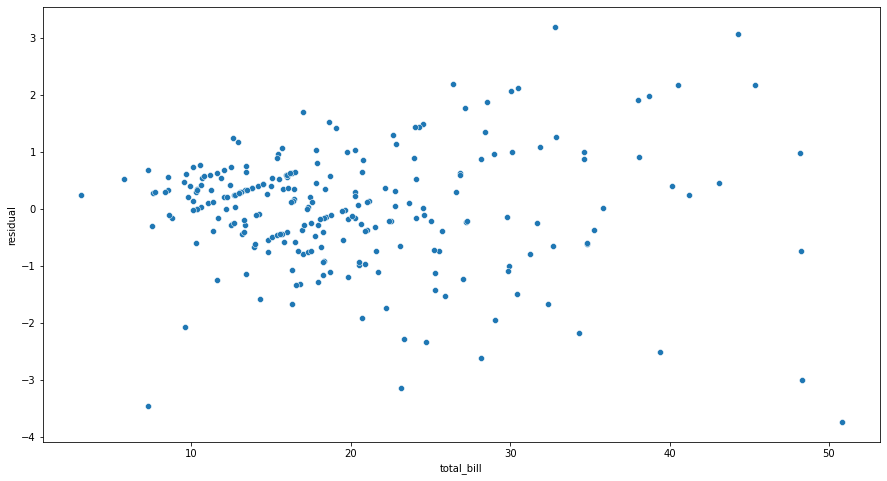

In [6]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='total_bill', y='residual')
plt.show()

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [7]:
df['residual^2'] = df.residual**2
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,residual,residual^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636,2.871792
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223,0.119870
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,-0.373165,0.139252
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250,0.009458
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,-0.107178,0.011487


In [8]:
# Sum of squared error
sse = df['residual^2'].sum()
sse

252.788743850776

In [9]:
# find the mean squared error
mse = sse/len(df)
mse

1.036019442011377

In [10]:
# find the root mean squared error
rmse = sqrt(mse)
rmse

1.0178504025697377

In [11]:
# create baseline to find ess and tss
df['baseline'] = df.tip.mean()
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,residual,residual^2,baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636,2.871792,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223,0.119870,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,-0.373165,0.139252,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250,0.009458,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,-0.107178,0.011487,2.998279


In [12]:
# set residual_baseline
df['residual_baseline'] = df.baseline - df.tip
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,residual,residual^2,baseline,residual_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636,2.871792,2.998279,1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223,0.119870,2.998279,1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,-0.373165,0.139252,2.998279,-0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250,0.009458,2.998279,-0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,-0.107178,0.011487,2.998279,-0.611721


In [13]:
# set residual_baseline2
df['residual_baseline^2'] = df.residual_baseline ** 2
df.head()


,total_bill,tip,sex,smoker,day,time,size,yhat,residual,residual^2,baseline,residual_baseline,residual_baseline^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636,2.871792,2.998279,1.988279,3.953252
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223,0.119870,2.998279,1.338279,1.790990
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,-0.373165,0.139252,2.998279,-0.501721,0.251724
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250,0.009458,2.998279,-0.311721,0.097170
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,-0.107178,0.011487,2.998279,-0.611721,0.374203


In [14]:
# set ess (explained sum squred)
ess = sum((df.yhat - df.tip.mean())**2)
ess

212.42373319840416

In [15]:
# set tss
tss = sum((df.tip - df.tip.mean())**2)
tss

465.21247704918085

In [16]:
# show tss (total sum square)
ess+sse

465.21247704918017

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [17]:
# find baselinee sse
baseline_sse = sum(df['residual_baseline^2'])
baseline_sse

465.21247704918085

In [18]:
# find baseline mse
baseline_mse = baseline_sse/len(df)
baseline_mse

1.9066085124966428

In [19]:
# find baseline rmse
baseline_rmse = sqrt(baseline_sse)
baseline_rmse

21.568784783783737

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [20]:
model_error = baseline_sse - sse
if model_error > 0:
    print(f'Model reduced errors by {round(model_error)} errors')
else:
    print(f'Model under baseline by {model_error} errors')
          

Model reduced errors by 212 errors


7. What is the amount of variance explained in your model?

In [21]:
# variance explained is ess (y target error) over tss (features )
r2 = ess/tss
r2

0.45661658635167557

8. Is your model better than the baseline model?

In [22]:
# Yes, model explains 45% of error between baseline and regression line

9. Create a file named evaluate.py that contains the following functions.
- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [23]:
# Create residual column
def get_residuals(df):
    
    X = df[['total_bill']]
    y = df[['tip']]
   
    # Create Linear Regression Container and fit to data
    ols_model = LinearRegression().fit(X,y)

    # Create prediction column based on feature
    df['yhat'] = ols_model.predict(y)

    # create residiaul column as differnce of prediction and actual
    df['residual'] = df.yhat - df.tip
    
    return df
    
# plot_residuals(y, yhat): creates a residual plot
def plot_residuals(df):
    plt.figure(figsize=(15,8))
    sns.scatterplot(data=df, x=df.total_bill, y=df.residual)
    plt.show()

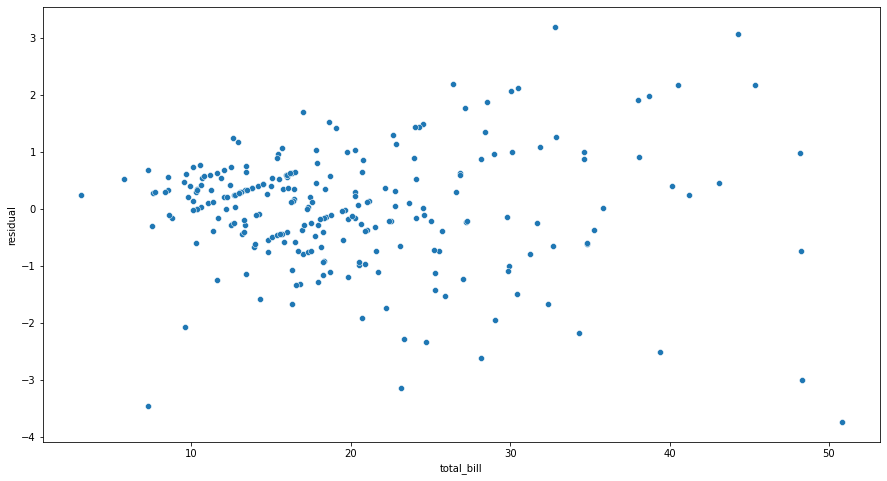

In [24]:
plot_residuals(df)

In [25]:
# regression_errors(y, yhat): returns the following values:, - sum of squared errors (SSE), - explained sum of squares (ESS)
# - total sum of squares (TSS), - mean squared error (MSE), - root mean squared error (RMSE)

def regression_errors(df):
    
    # create residual squared
    df = df['residual^2'] = df.residual**2

    # create sum of squared residuals
    sse = df['residual^2'].sum()

    # find mean of squared residuals
    mse = sse/len(df)
    
    # find root of the mean of squared residuals
    rmse = sqrt(mse)
    
    # find explained square sum of errors
    ess = sum((df.yhat - df.tip.mean())**2)
    
    # fine total sum squared of errors
    tss = sum((df.tip - df.tip.mean())**2)
    
    return df, sse, mse, rmse, ess, tss


In [26]:
sse, mse, rmse, ess, tss

(252.788743850776,
 1.036019442011377,
 1.0178504025697377,
 212.42373319840416,
 465.21247704918085)

In [27]:
# baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

In [28]:
def baseline_mean_errors(df):
    df['baseline'] = df.tip.mean()

    df['residual_baseline'] = df.baseline - df.tip

    df['residual_baseline^2'] = df.residual_baseline ** 2

    baseline_sse = sum(df['residual_baseline^2'])

    baseline_mse = baseline_sse/len(df)

    baseline_rmse = sqrt(baseline_sse)

    return df, baseline_sse, baseline_mse, baseline_rmse

In [29]:
baseline_sse, baseline_mse, baseline_rmse

(465.21247704918085, 1.9066085124966428, 21.568784783783737)

In [30]:
# better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false


In [31]:
def better_than_baseline(rmse, baseline_rmse):
    return print(f' model is better than baseline : {rmse < baseline_rmse}')

In [32]:
better_than_baseline(rmse,baseline_rmse)

 model is better than baseline : True


10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [33]:
from pydataset import data

In [34]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [35]:
ols_model = LinearRegression().fit(mpg[['displ']],mpg.hwy)

In [36]:
yhat = ols_model.predict(mpg[['displ']])

In [37]:
mpg['yhat'] = yhat
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,yhat
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,29.342591
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,29.342591
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,28.636473
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,28.636473
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,25.812002


In [38]:
residual = yhat - mpg.hwy
mpg['residual'] = residual
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,yhat,residual
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,29.342591,0.342591
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,29.342591,0.342591
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,28.636473,-2.363527
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,28.636473,-1.363527
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,25.812002,-0.187998


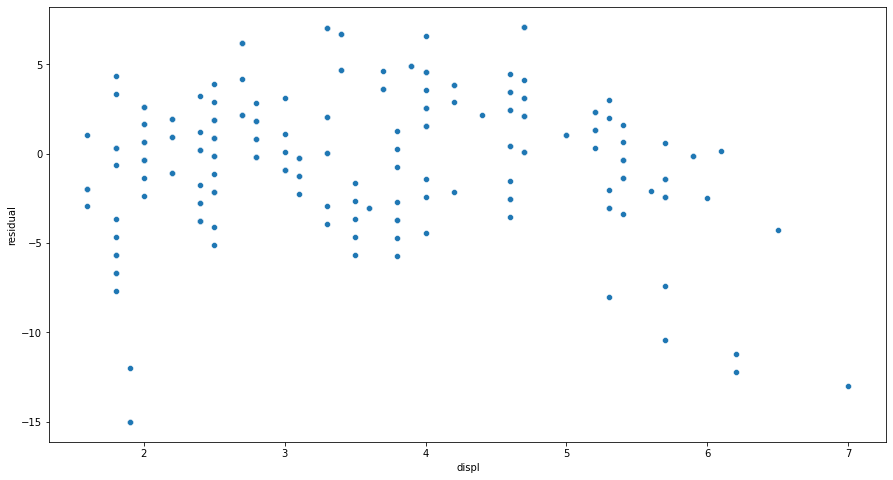

In [39]:
plt.figure(figsize=(15,8))
sns.scatterplot(mpg.displ, mpg.residual)
plt.show()

In [40]:
# create residual squared
mpg['residual^2'] = residual ** 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,yhat,residual,residual^2
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,29.342591,0.342591,0.117369
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,29.342591,0.342591,0.117369
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,28.636473,-2.363527,5.586258
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,28.636473,-1.363527,1.859205
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,25.812002,-0.187998,0.035343


In [41]:
# create SSE
sse = sum(mpg['residual^2'])
sse

3413.8290089954644

In [42]:
# create MSE
mse = sse/len(mpg)
mse

14.589012858954977

In [43]:
# create rmse
rmse = sqrt(mse)
rmse

3.819556631201451

In [44]:
# find mse
mean_squared_error(mpg.hwy, mpg.yhat) 

14.589012858954987

In [45]:
# find sse
mean_squared_error(mpg.hwy, mpg.yhat) * len(mpg)

3413.829008995467

In [46]:
# find rmse
sqrt(mean_squared_error(mpg.hwy, mpg.yhat))

3.8195566312014524